In [1]:
from symbolfit.symbolfit import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Dataset

Five inputs are needed, which can be python lists or numpy arrays (more options will be added in future!):
1. ``x``: independent variable (bin center location).
2. ``y``: dependent variable.
3. ``y_up``: upward uncertainty in y per bin.
4. ``y_down``: downward uncertainty in y per bin.
5. ``bin_edges_2d`` bin edges in x (2D).
- Elements in both y_up and y_down should be non-negative values.
- These values are the "delta" in y,
  - y + y_up = y shifted up by one standard deviation.
  - y - y_down = y shifted down by one standard deviation.
- If no uncertainty in the dataset, one can set both y_up and y_down to ones with the same shape as y.

In [2]:
# each element contains bin centers [x0, x1]
x = np.array([[-0.89473684, 0.075], [-0.68421053, 0.075], [-0.47368421, 0.075], [-0.26315789, 0.075], [-0.05263158, 0.075], [0.15789474, 0.075], [0.36842105, 0.075], [0.57894737, 0.075], [0.78947368, 0.075], [1.0, 0.075], [1.21052632, 0.075], [1.42105263, 0.075], [1.63157895, 0.075], [1.84210526, 0.075], [2.05263158, 0.075], [2.26315789, 0.075], [2.47368421, 0.075], [2.68421053, 0.075], [2.89473684, 0.075], [-0.89473684, 0.225], [-0.68421053, 0.225], [-0.47368421, 0.225], [-0.26315789, 0.225], [-0.05263158, 0.225], [0.15789474, 0.225], [0.36842105, 0.225], [0.57894737, 0.225], [0.78947368, 0.225], [1.0, 0.225], [1.21052632, 0.225], [1.42105263, 0.225], [1.63157895, 0.225], [1.84210526, 0.225], [2.05263158, 0.225], [2.26315789, 0.225], [2.47368421, 0.225], [2.68421053, 0.225], [2.89473684, 0.225], [-0.89473684, 0.35], [-0.68421053, 0.35], [-0.47368421, 0.35], [-0.26315789, 0.35], [-0.05263158, 0.35], [0.15789474, 0.35], [0.36842105, 0.35], [0.57894737, 0.35], [0.78947368, 0.35], [1.0, 0.35], [1.21052632, 0.35], [1.42105263, 0.35], [1.63157895, 0.35], [1.84210526, 0.35], [2.05263158, 0.35], [2.26315789, 0.35], [2.47368421, 0.35], [2.68421053, 0.35], [2.89473684, 0.35], [-0.89473684, 0.45], [-0.68421053, 0.45], [-0.47368421, 0.45], [-0.26315789, 0.45], [-0.05263158, 0.45], [0.15789474, 0.45], [0.36842105, 0.45], [0.57894737, 0.45], [0.78947368, 0.45], [1.0, 0.45], [1.21052632, 0.45], [1.42105263, 0.45], [1.63157895, 0.45], [1.84210526, 0.45], [2.05263158, 0.45], [2.26315789, 0.45], [2.47368421, 0.45], [2.68421053, 0.45], [2.89473684, 0.45], [-0.89473684, 0.55], [-0.68421053, 0.55], [-0.47368421, 0.55], [-0.26315789, 0.55], [-0.05263158, 0.55], [0.15789474, 0.55], [0.36842105, 0.55], [0.57894737, 0.55], [0.78947368, 0.55], [1.0, 0.55], [1.21052632, 0.55], [1.42105263, 0.55], [1.63157895, 0.55], [1.84210526, 0.55], [2.05263158, 0.55], [2.26315789, 0.55], [2.47368421, 0.55], [2.68421053, 0.55], [2.89473684, 0.55], [-0.89473684, 0.65], [-0.68421053, 0.65], [-0.47368421, 0.65], [-0.26315789, 0.65], [-0.05263158, 0.65], [0.15789474, 0.65], [0.36842105, 0.65], [0.57894737, 0.65], [0.78947368, 0.65], [1.0, 0.65], [1.21052632, 0.65], [1.42105263, 0.65], [1.63157895, 0.65], [1.84210526, 0.65], [2.05263158, 0.65], [2.26315789, 0.65], [2.47368421, 0.65], [2.68421053, 0.65], [2.89473684, 0.65], [-0.89473684, 0.75], [-0.68421053, 0.75], [-0.47368421, 0.75], [-0.26315789, 0.75], [-0.05263158, 0.75], [0.15789474, 0.75], [0.36842105, 0.75], [0.57894737, 0.75], [0.78947368, 0.75], [1.0, 0.75], [1.21052632, 0.75], [1.42105263, 0.75], [1.63157895, 0.75], [1.84210526, 0.75], [2.05263158, 0.75], [2.26315789, 0.75], [2.47368421, 0.75], [2.68421053, 0.75], [2.89473684, 0.75], [-0.89473684, 0.85], [-0.68421053, 0.85], [-0.47368421, 0.85], [-0.26315789, 0.85], [-0.05263158, 0.85], [0.15789474, 0.85], [0.36842105, 0.85], [0.57894737, 0.85], [0.78947368, 0.85], [1.0, 0.85], [1.21052632, 0.85], [1.42105263, 0.85], [1.63157895, 0.85], [1.84210526, 0.85], [2.05263158, 0.85], [2.26315789, 0.85], [2.47368421, 0.85], [2.68421053, 0.85], [2.89473684, 0.85], [-0.89473684, 0.95], [-0.68421053, 0.95], [-0.47368421, 0.95], [-0.26315789, 0.95], [-0.05263158, 0.95], [0.15789474, 0.95], [0.36842105, 0.95], [0.57894737, 0.95], [0.78947368, 0.95], [1.0, 0.95], [1.21052632, 0.95], [1.42105263, 0.95], [1.63157895, 0.95], [1.84210526, 0.95], [2.05263158, 0.95], [2.26315789, 0.95], [2.47368421, 0.95], [2.68421053, 0.95], [2.89473684, 0.95], [-0.89473684, 1.1], [-0.68421053, 1.1], [-0.47368421, 1.1], [-0.26315789, 1.1], [-0.05263158, 1.1], [0.15789474, 1.1], [0.36842105, 1.1], [0.57894737, 1.1], [0.78947368, 1.1], [1.0, 1.1], [1.21052632, 1.1], [1.42105263, 1.1], [1.63157895, 1.1], [1.84210526, 1.1], [2.05263158, 1.1], [2.26315789, 1.1], [2.47368421, 1.1], [2.68421053, 1.1], [2.89473684, 1.1], [-0.89473684, 1.3], [-0.68421053, 1.3], [-0.47368421, 1.3], [-0.26315789, 1.3], [-0.05263158, 1.3], [0.15789474, 1.3], [0.36842105, 1.3], [0.57894737, 1.3], [0.78947368, 1.3], [1.0, 1.3], [1.21052632, 1.3], [1.42105263, 1.3], [1.63157895, 1.3], [1.84210526, 1.3], [2.05263158, 1.3], [2.26315789, 1.3], [2.47368421, 1.3], [2.68421053, 1.3], [2.89473684, 1.3], [-0.89473684, 1.5], [-0.68421053, 1.5], [-0.47368421, 1.5], [-0.26315789, 1.5], [-0.05263158, 1.5], [0.15789474, 1.5], [0.36842105, 1.5], [0.57894737, 1.5], [0.78947368, 1.5], [1.0, 1.5], [1.21052632, 1.5], [1.42105263, 1.5], [1.63157895, 1.5], [1.84210526, 1.5], [2.05263158, 1.5], [2.26315789, 1.5], [2.47368421, 1.5], [2.68421053, 1.5], [2.89473684, 1.5]])
  
bin_edges_2d = [
# bin edges for x0, including both the leftmost and rightmost bin edge locations
[-1.0, -0.78947368, -0.57894737, -0.36842105, -0.15789474, 0.05263158, 0.26315789, 0.47368421, 0.68421053, 0.89473684, 1.10526316, 1.31578947, 1.52631579, 1.73684211, 1.94736842, 2.15789474, 2.36842105, 2.57894737, 2.78947368, 3.0],
# bin edges for x1, including both the leftmost and rightmost bin edge locations
[0, 0.15, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6]
]

# bin content in the same order as x
y=np.array([5.80841135, 5.66442451, 5.67092581, 5.99946465, 6.72334223, 11.8839351, 11.70210389, 10.83160653, 11.05671041, 11.65505484, 11.74977073, 11.37863092, 11.04891891, 10.54443351, 9.85884817, 9.26198068, 9.08346238, 9.01124884, 8.67448045, 5.51642995, 5.7399991, 5.86204003, 5.60075074, 7.12460168, 10.45591606, 11.34577307, 11.83253602, 11.80115663, 11.92143126, 11.98332533, 11.25828175, 11.13023136, 11.0448041, 10.32717692, 9.87007297, 10.33007073, 9.47437583, 9.33825107, 5.87552528, 5.87226917, 5.72407392, 5.99459365, 7.21075706, 9.57999944, 11.14630517, 11.6052531, 12.20383696, 11.33453781, 11.80621707, 11.31355362, 11.04485278, 11.31490029, 10.68133191, 10.18161626, 10.05683147, 9.85443861, 9.52620355, 5.82147825, 5.80449118, 5.63844187, 6.48911637, 7.60877817, 8.87604788, 10.79030596, 11.25448546, 11.73984289, 11.54042128, 11.53108651, 11.77014235, 11.33396207, 11.07519537, 11.19571342, 10.9709825, 10.52073887, 10.78998701, 10.24676479, 5.40030606, 5.97796282, 6.25649514, 6.58593961, 7.12571107, 8.93839847, 10.54214421, 10.91076023, 11.48655234, 11.72277884, 11.36044296, 11.5814517, 10.81553606, 11.37393839, 11.51261109, 11.10538056, 11.53835619, 10.83521735, 10.79516764, 5.76103808, 6.05957763, 5.73345161, 6.93045976, 7.70874758, 8.68025502, 9.90211269, 10.67858906, 10.98456766, 11.24592033, 11.52426219, 11.6804926, 11.73968818, 12.05440218, 11.51011004, 12.15144204, 11.33511877, 11.42029543, 11.62863775, 5.82309015, 5.70233518, 6.18687988, 6.86941477, 7.44651824, 8.77611487, 9.4621706, 9.94369755, 11.03747666, 11.36118742, 11.7133363, 11.79463553, 11.45248231, 11.48968055, 11.92679536, 11.79350837, 11.64662208, 11.66921516, 11.88779862, 5.96080281, 6.19532031, 6.66100621, 7.11673085, 7.93906306, 8.65205942, 9.0672692, 9.90619603, 10.58915112, 11.20612733, 11.41915251, 11.76774314, 11.7698089, 11.64708833, 11.57544731, 11.071521, 11.27764519, 10.06558254, 9.83321735, 6.74386781, 6.85226433, 6.75876726, 7.52738693, 7.76740625, 8.0921833, 9.00932201, 9.41135028, 10.49111133, 10.82817243, 11.18615416, 11.60584065, 11.85012171, 11.21194604, 10.73622112, 10.16814234, 9.25557285, 8.08406331, 7.23654642, 7.16990421, 6.8930864, 7.11595218, 7.394774, 7.86296989, 8.23172581, 8.99027074, 9.20180569, 9.92003726, 10.63651025, 11.13158267, 11.4975352, 11.40471321, 10.91301231, 9.16523291, 7.73576722, 6.79121611, 5.88174515, 5.8742713, 7.74862464, 7.34760779, 7.53062726, 7.71586872, 7.9387384, 7.97935795, 8.36479935, 8.80446465, 9.61325079, 10.36513735, 11.51424305, 11.61080369, 11.54216016, 9.31600183, 7.45511379, 5.79114212, 5.62415307, 5.57120758, 5.37471341, 7.72439334, 7.61811624, 7.7787156, 7.86881202, 8.33080852, 8.17588793, 8.18102946, 8.44622712, 9.16084102, 9.62534026, 11.19359533, 11.91121198, 10.74212391, 7.51410687, 6.1778789, 5.74659241, 6.01959324, 5.11988353, 5.63018625])

y_up=np.array([0.58084114, 0.56644245, 0.56709258, 0.59994646, 0.67233422, 1.18839351, 1.17021039, 1.08316065, 1.10567104, 1.16550548, 1.17497707, 1.13786309, 1.10489189, 1.05444335, 0.98588482, 0.92619807, 0.90834624, 0.90112488, 0.86744805, 0.55164299, 0.57399991, 0.586204, 0.56007507, 0.71246017, 1.04559161, 1.13457731, 1.1832536, 1.18011566, 1.19214313, 1.19833253, 1.12582818, 1.11302314, 1.10448041, 1.03271769, 0.9870073, 1.03300707, 0.94743758, 0.93382511, 0.58755253, 0.58722692, 0.57240739, 0.59945936, 0.72107571, 0.95799994, 1.11463052, 1.16052531, 1.2203837, 1.13345378, 1.18062171, 1.13135536, 1.10448528, 1.13149003, 1.06813319, 1.01816163, 1.00568315, 0.98544386, 0.95262036, 0.58214782, 0.58044912, 0.56384419, 0.64891164, 0.76087782, 0.88760479, 1.0790306, 1.12544855, 1.17398429, 1.15404213, 1.15310865, 1.17701424, 1.13339621, 1.10751954, 1.11957134, 1.09709825, 1.05207389, 1.0789987, 1.02467648, 0.54003061, 0.59779628, 0.62564951, 0.65859396, 0.71257111, 0.89383985, 1.05421442, 1.09107602, 1.14865523, 1.17227788, 1.1360443, 1.15814517, 1.08155361, 1.13739384, 1.15126111, 1.11053806, 1.15383562, 1.08352173, 1.07951676, 0.57610381, 0.60595776, 0.57334516, 0.69304598, 0.77087476, 0.8680255, 0.99021127, 1.06785891, 1.09845677, 1.12459203, 1.15242622, 1.16804926, 1.17396882, 1.20544022, 1.151011, 1.2151442, 1.13351188, 1.14202954, 1.16286378, 0.58230901, 0.57023352, 0.61868799, 0.68694148, 0.74465182, 0.87761149, 0.94621706, 0.99436975, 1.10374767, 1.13611874, 1.17133363, 1.17946355, 1.14524823, 1.14896806, 1.19267954, 1.17935084, 1.16466221, 1.16692152, 1.18877986, 0.59608028, 0.61953203, 0.66610062, 0.71167308, 0.79390631, 0.86520594, 0.90672692, 0.9906196, 1.05891511, 1.12061273, 1.14191525, 1.17677431, 1.17698089, 1.16470883, 1.15754473, 1.1071521, 1.12776452, 1.00655825, 0.98332174, 0.67438678, 0.68522643, 0.67587673, 0.75273869, 0.77674062, 0.80921833, 0.9009322, 0.94113503, 1.04911113, 1.08281724, 1.11861542, 1.16058406, 1.18501217, 1.1211946, 1.07362211, 1.01681423, 0.92555728, 0.80840633, 0.72365464, 0.71699042, 0.68930864, 0.71159522, 0.7394774, 0.78629699, 0.82317258, 0.89902707, 0.92018057, 0.99200373, 1.06365103, 1.11315827, 1.14975352, 1.14047132, 1.09130123, 0.91652329, 0.77357672, 0.67912161, 0.58817452, 0.58742713, 0.77486246, 0.73476078, 0.75306273, 0.77158687, 0.79387384, 0.7979358, 0.83647994, 0.88044646, 0.96132508, 1.03651373, 1.15142431, 1.16108037, 1.15421602, 0.93160018, 0.74551138, 0.57911421, 0.56241531, 0.55712076, 0.53747134, 0.77243933, 0.76181162, 0.77787156, 0.7868812, 0.83308085, 0.81758879, 0.81810295, 0.84462271, 0.9160841, 0.96253403, 1.11935953, 1.1911212, 1.07421239, 0.75141069, 0.61778789, 0.57465924, 0.60195932, 0.51198835, 0.56301862])

y_down=np.array([0.58084114, 0.56644245, 0.56709258, 0.59994646, 0.67233422, 1.18839351, 1.17021039, 1.08316065, 1.10567104, 1.16550548, 1.17497707, 1.13786309, 1.10489189, 1.05444335, 0.98588482, 0.92619807, 0.90834624, 0.90112488, 0.86744805, 0.55164299, 0.57399991, 0.586204, 0.56007507, 0.71246017, 1.04559161, 1.13457731, 1.1832536, 1.18011566, 1.19214313, 1.19833253, 1.12582818, 1.11302314, 1.10448041, 1.03271769, 0.9870073, 1.03300707, 0.94743758, 0.93382511, 0.58755253, 0.58722692, 0.57240739, 0.59945936, 0.72107571, 0.95799994, 1.11463052, 1.16052531, 1.2203837, 1.13345378, 1.18062171, 1.13135536, 1.10448528, 1.13149003, 1.06813319, 1.01816163, 1.00568315, 0.98544386, 0.95262036, 0.58214782, 0.58044912, 0.56384419, 0.64891164, 0.76087782, 0.88760479, 1.0790306, 1.12544855, 1.17398429, 1.15404213, 1.15310865, 1.17701424, 1.13339621, 1.10751954, 1.11957134, 1.09709825, 1.05207389, 1.0789987, 1.02467648, 0.54003061, 0.59779628, 0.62564951, 0.65859396, 0.71257111, 0.89383985, 1.05421442, 1.09107602, 1.14865523, 1.17227788, 1.1360443, 1.15814517, 1.08155361, 1.13739384, 1.15126111, 1.11053806, 1.15383562, 1.08352173, 1.07951676, 0.57610381, 0.60595776, 0.57334516, 0.69304598, 0.77087476, 0.8680255, 0.99021127, 1.06785891, 1.09845677, 1.12459203, 1.15242622, 1.16804926, 1.17396882, 1.20544022, 1.151011, 1.2151442, 1.13351188, 1.14202954, 1.16286378, 0.58230901, 0.57023352, 0.61868799, 0.68694148, 0.74465182, 0.87761149, 0.94621706, 0.99436975, 1.10374767, 1.13611874, 1.17133363, 1.17946355, 1.14524823, 1.14896806, 1.19267954, 1.17935084, 1.16466221, 1.16692152, 1.18877986, 0.59608028, 0.61953203, 0.66610062, 0.71167308, 0.79390631, 0.86520594, 0.90672692, 0.9906196, 1.05891511, 1.12061273, 1.14191525, 1.17677431, 1.17698089, 1.16470883, 1.15754473, 1.1071521, 1.12776452, 1.00655825, 0.98332174, 0.67438678, 0.68522643, 0.67587673, 0.75273869, 0.77674062, 0.80921833, 0.9009322, 0.94113503, 1.04911113, 1.08281724, 1.11861542, 1.16058406, 1.18501217, 1.1211946, 1.07362211, 1.01681423, 0.92555728, 0.80840633, 0.72365464, 0.71699042, 0.68930864, 0.71159522, 0.7394774, 0.78629699, 0.82317258, 0.89902707, 0.92018057, 0.99200373, 1.06365103, 1.11315827, 1.14975352, 1.14047132, 1.09130123, 0.91652329, 0.77357672, 0.67912161, 0.58817452, 0.58742713, 0.77486246, 0.73476078, 0.75306273, 0.77158687, 0.79387384, 0.7979358, 0.83647994, 0.88044646, 0.96132508, 1.03651373, 1.15142431, 1.16108037, 1.15421602, 0.93160018, 0.74551138, 0.57911421, 0.56241531, 0.55712076, 0.53747134, 0.77243933, 0.76181162, 0.77787156, 0.7868812, 0.83308085, 0.81758879, 0.81810295, 0.84462271, 0.9160841, 0.96253403, 1.11935953, 1.1911212, 1.07421239, 0.75141069, 0.61778789, 0.57465924, 0.60195932, 0.51198835, 0.56301862])

Plot the dataset to see what we will be fitting to:

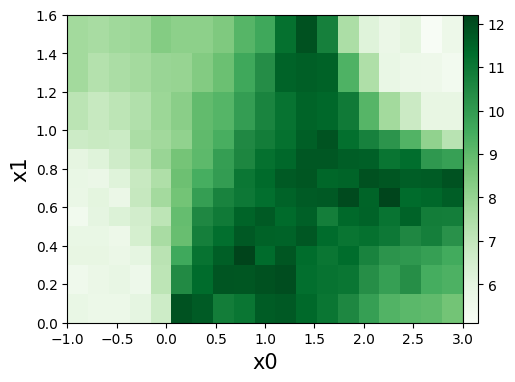

In [3]:
x0_bins = np.reshape(np.array(bin_edges_2d[0]), (-1))
x1_bins = np.reshape(np.array(bin_edges_2d[1]), (-1))

fig, axes = plt.subplots(figsize=(6,4))
fig_ax = axes.hist2d(x[:,0], x[:,1],
                     bins = [x0_bins, x1_bins],
                     weights = np.squeeze(y),
                     cmap = 'Greens',
                     edgecolor = 'none'
                     )

cbar_data = plt.colorbar(fig_ax[3], ax=axes, pad=0)

plt.xlabel('x0', fontsize=15)
plt.ylabel('x1', fontsize=15)
plt.savefig('img/toy3c/dataset.png')

# Configure the fit

Configure PySR to define the function space being searched for with symbolic regression:

In [4]:
from pysr import PySRRegressor
import sympy

pysr_config = PySRRegressor(
    model_selection = 'accuracy',
    niterations = 200,
    maxsize = 60,
    binary_operators = [
        '+', '*'
                     ],
    unary_operators = [
        'exp',
        'gauss(x) = exp(-x*x)',
        'tanh',
    ],
    nested_constraints = {
        'tanh':   {'tanh': 0, 'exp': 0, 'gauss': 0, '*': 2},
        'exp':    {'tanh': 0, 'exp': 0, 'gauss': 0, '*': 2},
        'gauss':  {'tanh': 0, 'exp': 0, 'gauss': 0, '*': 2},
        '*':      {'tanh': 1, 'exp': 1, 'gauss': 1, '*': 2},
    },
    extra_sympy_mappings={
        'gauss': lambda x: sympy.exp(-x*x),
                         },
    loss='loss(y, y_pred, weights) = (y - y_pred)^2 * weights',
)

Here, we allow two binary operators (+, *) and three unary operators (exp, gauss, tanh) when searching for functional forms. The custom-defined gauss is there because this dataset has a peak. One can define any other function they want for their shapes.

Nested constraints are imposed to prohibit, e.g., exp(exp(x))...

Loss function is a weighted MSE, where the weight is the sqaured uncertainty by default in SymbolFit.

For PySR options, please see:
- https://github.com/MilesCranmer/PySR
- https://astroautomata.com/PySR/

Configure SymbolFit with the PySR config and for the re-optimization process:

In [5]:
model = SymbolFit(
        # Dataset: x, y, y_up, y_down.
    	x = x,
    	y = y,
    	y_up = y_up,
    	y_down = y_down,
    
        # PySR configuration of the function space.
    	pysr_config = pysr_config,
    
        # Constrain the maximum function size and over-write maxsize in pysr_config.
        # Set a higher value for more complex shape, or when the lower one does not fit well.
    	max_complexity = 60,
    
        # Whether to scale input x to be within 0 and 1 for the fits for numerical stability,
        # as large x could lead to overflow when there is e.g. exp(x) -> exp(10000).
        # So set this to False when your x's are or close to O(1), otherwise recommended to set True.
        # After the fits, the functions will be unscaled to relect the original dataset.
    	input_rescale = False,
        # ^ no scaling needed here since the input x is O(1).
    
        # Whether to scale y for the fits for numerical stability,
        # options are (when input_rescale is True): None / 'mean' / 'max' / 'l2'.
        # This is useful to stabilize fits when your y's are very large or very small.
        # After the fits, the functions will be unscaled to relect the original dataset.
    	scale_y_by = None,
        # ^ no scaling needed here since the input y is O(1).
    
        # Set a maximum standard error (%) for all parameters to avoid bad fits during re-optimization.
        # In the refit loop, when any of the parameters returns a standard error larger than max_stderr,
        # the fit is considered failed, and the fit will retry itself for fewer or other combination of varying parameters,
        # by freezing some of the parameters to their initial values and kept fixed during re-optimization.
        # This is to avoid bad fits when the objective is too complex to minimize, which could cause some parameters
        # to have unrealistically large standard errors.
        # In most cases 10 < max_stderr < 100 suffices.
    	max_stderr = 20,
    
        # Consider y_up and y_down to weight the MSE loss during SR search and re-optimization.
    	fit_y_unc = True,
    
        # Set a random seed for returning the same batch of functional forms every time (single-threaded),
        # otherwise set None to explore more functions every time (multi-threaded and faster).
        # In most cases the function space is huge, one can retry the fits with the exact same fit configuration
        # and get completely different sets of candidate functions, merely by using different random seeds.
        # So if the candidate functions are not satisfactory this time, rerun it few times more with
        # random_seed = None or a different seed each time.
    	random_seed = None,
    
        # Custome loss weight to set "(y - y_pred)^2 * loss_weights", overwriting that with y_up and y_down.
    	loss_weights = None
)

# Symbol Fit it!

Run the fits: SR fit for functional form searching -> parameterization -> re-optimization fit for improved best-fits and uncertainty estimation -> evaluation.

In [6]:
model.fit()

Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 2.500e+05
Head worker occupation: 22.9%
Progress: 539 / 3000 total iterations (17.967%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.353e+01  7.971e+00  y = exp(1.6449)
3           6.523e+00  7.294e-01  y = 6.173 + 0.68568
4           4.965e+00  2.729e-01  y = 7.1069 + tanh(6.2684)
5           3.787e+00  2.709e-01  y = exp(2.0116) + tanh(x₀)
7           3.512e+00  3.767e-02  y = tanh(1.6926 * x₀) + exp(2.0116)
8           2.958e+00  1.716e-01  y = (gauss(x₁ * x₁) * x₀) + 7.797
10          2.169e+00  1.551e-01  y = (5.8715 + (gauss(-1.1066 + x₀) * 4.5936)) + 0.76196
11          1.904e+00  1.303e-01  y = ((4.5041 * gauss(-1.2574 + x₀)) + 6.173) + gauss(x₁)
12          1.889e+00  7.988e-03  y = (exp(1.93) + (3.6208 * gauss(x₀ + -1.2023))) + tanh(x₀)
13          1.170e+00  4.794e-01  y = ((4.5041 * gauss(-1.1066 + x₀)) + 6.173) + (x

## Save results to output files

Save results to csv tables:
- ``candidates.csv``: saves all candidate functions and evaluations in a csv table.
- ``candidates_reduced.csv``: saves a reduced version for essential information without intermediate results.

In [7]:
model.save_to_csv(output_dir = 'output_Toy_dataset_3c/')

Saving full results >>> output_Toy_dataset_3c/candidates.csv
Saving reduced results >>> output_Toy_dataset_3c/candidates_reduced.csv


Plot results to pdf files:
- ``candidates.pdf``: plots all candidate functions for fit quality evaluation.
- ``candidates_gof.pdf``: plots the goodness-of-fit scores.
- ``candidates_correlation.pdf``: plots the correlation matrices for the parameters of the candidate functions.

In [8]:
model.plot_to_pdf(
    	output_dir = 'output_Toy_dataset_3c/',
    	#bin_widths_1d = bin_widths_1d,
    	bin_edges_2d = bin_edges_2d,
    	plot_logy = False,
    	plot_logx = False,
        sampling_95quantile = False
)

Plotting candidate functions 46/46 >>> output_Toy_dataset_3c/candidates.pdf
Plotting correlation matrices 46/46 >>> output_Toy_dataset_3c/candidates_correlation.pdf
Plotting goodness-of-fit scores >>> output_Toy_dataset_3c/candidates_gof.pdf
